<a href="https://colab.research.google.com/github/Ekawaka/MACHINE-LEARNING-II/blob/main/Week_2_KDE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Kernel Density Estimation (KDE) in Clustering


In [ ]:
## Implementation in python

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Generate some data
np.random.seed(42)
data = np.random.normal(0, 1, size=1000)

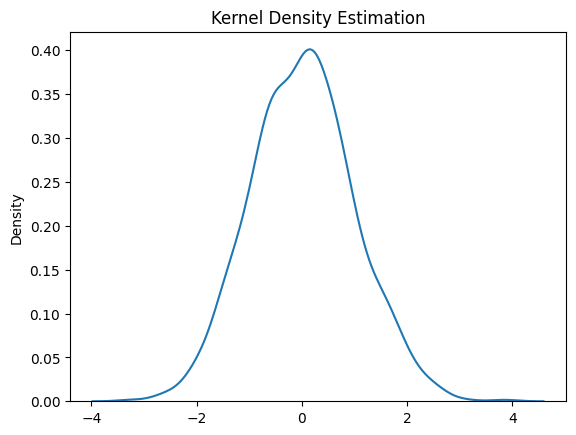

In [ ]:
# plot the KDE
sns.kdeplot(data, bw_adjust=1)
plt.title("Kernel Density Estimation")
plt.show()

## KDE for clustering

In [ ]:
from sklearn.datasets import make_blobs

# Generate a dataset
data, _ = make_blobs(n_samples=1000, centers = 3, cluster_std=0.6)

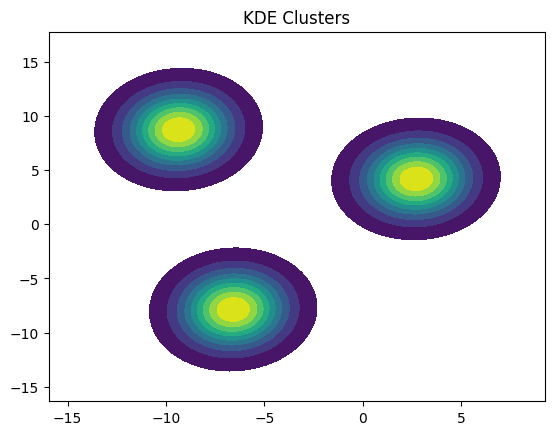

In [ ]:
# Plot the KDE for the cluster
sns.kdeplot(x = data[:, 0], y = data[:, 1], bw_adjust=1, cmap = 'viridis', fill=True, legend=True)
plt.title('KDE Clusters')
plt.show()

## Bias-variance trade-off in Clustering

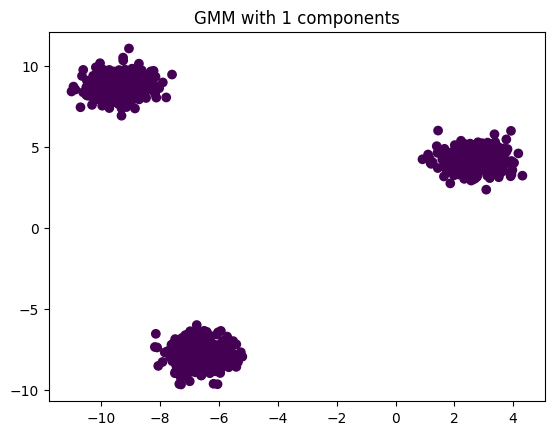

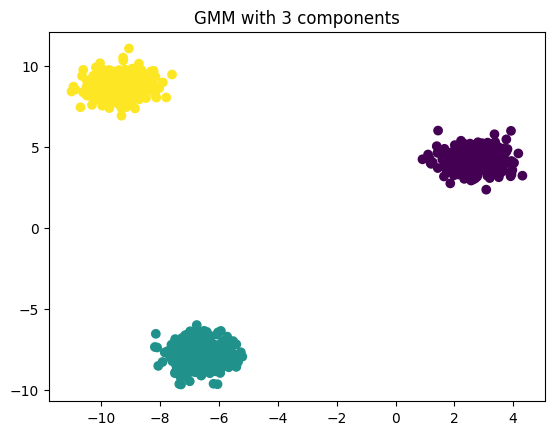

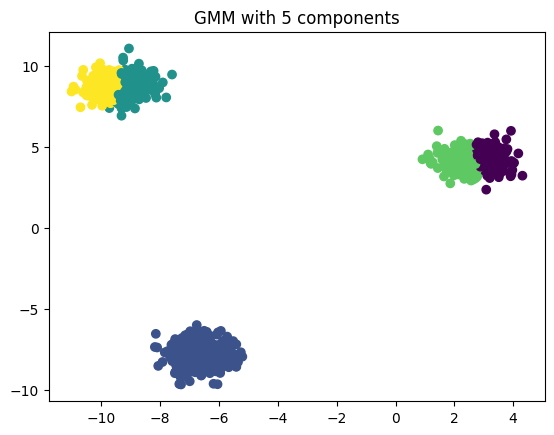

In [ ]:
from sklearn.mixture import GaussianMixture

# Fit GMM with different number of components
for n_components in [1,3,5]:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(data)
    labels = gmm.predict(data)

    plt.scatter(data[:, 0], data[:, 1], c = labels, cmap='viridis')
    plt.title(f'GMM with {n_components} components')
    plt.show()

### Polynomial Transformation in Clustering

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# Generate sample data
X = np.array([[1,2], [3,4], [5,6], [7,8]])

In [ ]:
# Apply a polynomial transformation on X
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

In [ ]:
# Print
print("Original Data: \n", X)
print("Polynomial Features:\n", X_poly)

Original Data: 
 [[1 2]
 [3 4]
 [5 6]
 [7 8]]
Polynomial Features:
 [[ 1.  1.  2.  1.  2.  4.]
 [ 1.  3.  4.  9. 12. 16.]
 [ 1.  5.  6. 25. 30. 36.]
 [ 1.  7.  8. 49. 56. 64.]]


# Creating a pipeline from CLustering

In [ ]:
# Import the libraries for the tasks
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.mixture import GaussianMixture

# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('gmm', GaussianMixture(n_components=3, random_state=42))
])


# Fit the pipeline
pipeline.fit(data)

Pipeline(steps=[('scaler', StandardScaler()), ('poly', PolynomialFeatures()),
                ('gmm', GaussianMixture(n_components=3, random_state=42))])

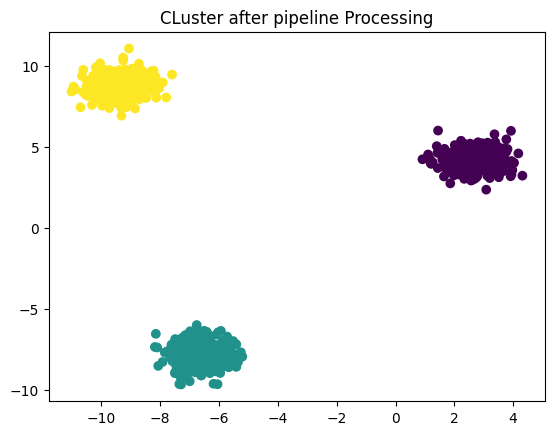

In [ ]:
# Predict using the pipeline
labels = pipeline.named_steps['gmm'].predict(pipeline.named_steps['poly'].transform(pipeline.named_steps['scaler'].transform(data)))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.title("CLuster after pipeline Processing")
plt.show()